In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
data = pd.read_excel("/content/drive/My Drive/Colab Notebooks/PB_ROBOT(1).xlsx", index_col=0)

data.head()

,bintang,review
username,,
salonayu10,5.0,Alhamdulillah paketnya sudah sampai dgn aman\n...
rubbyaqilla13,5.0,"Alhamdulillah, pesanan saya sudah sampai nih k..."
n*****1,2.0,"pertama kali aku kasih bintang di bwh 4, tpi e..."
erikatjhang,5.0,"Pengiriman sangat cepat, padahal belinya pas l..."
nandagiantari2002,5.0,"Jika ingin menghubungi layanan PLN 123, kamu d..."


# Labeling

Pembagian data menjadi data sentimen berlabel positif dan negatif dengan angka 1 untuk positif dan angka 0 untuk negatif. Pengklasifikasian ini dilakukan pada ulasan yang memiliki rating 4 dan 5 sebagai sentimen positif dan rating 3 sampai 1 sebagai sentimen negatif.

In [43]:
label = []
for index, row in data.iterrows():
    if row["bintang"] == 5 or row["bintang"] == 4:
        label.append(1)
    else:
        label.append(0)

data["label"] = label

data

,bintang,review,label
username,,,
salonayu10,5.0,Alhamdulillah paketnya sudah sampai dgn aman\n...,1
rubbyaqilla13,5.0,"Alhamdulillah, pesanan saya sudah sampai nih k...",1
n*****1,2.0,"pertama kali aku kasih bintang di bwh 4, tpi e...",0
erikatjhang,5.0,"Pengiriman sangat cepat, padahal belinya pas l...",1
nandagiantari2002,5.0,"Jika ingin menghubungi layanan PLN 123, kamu d...",1
...,...,...,...
hamilham041201,5.0,Pengiriman cepat semoga awet,1
riyadarmansyah,5.0,"produk oke banget, slim, warna nya hijau mate 👌👌",1
prishelapailo,5.0,NaN,1


In [44]:
data["label"].value_counts()

1    2946
0      57
Name: label, dtype: int64

# Menghitung Kata Dengan TF-IDF

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [46]:
Ulasan = data['review']

In [47]:
Ulasan.isnull().sum()

76

In [48]:
Ulasan = Ulasan.fillna('tidak ada komentar')

In [49]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

4983


In [50]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutan abjad kata 

{'alhamdulillah': 229,
 'paketnya': 3274,
 'sudah': 4281,
 'sampai': 3839,
 'dgn': 1183,
 'aman': 250,
 'prodak': 3593,
 'asli': 320,
 'ori': 3207,
 'dan': 1109,
 'berfungsi': 694,
 'cakep': 940,
 'banget': 504,
 'pas': 3295,
 'beli': 655,
 'lgi': 2515,
 'sale': 3819,
 'jadi': 1939,
 'bisa': 793,
 'hemmat': 1800,
 'dweh': 1456,
 'mudah2an': 2939,
 'awer': 356,
 'pb': 3305,
 'nya': 3110,
 'pelayanan': 3332,
 'ramah': 3672,
 'packing': 3250,
 'rapih': 3681,
 'makasih': 2619,
 'kak': 2065,
 'seller': 4006,
 'pesanan': 3461,
 'saya': 3883,
 'nih': 3072,
 'ka': 2052,
 'sesuai': 4081,
 'pengirimannya': 3400,
 'agak': 167,
 'lama': 2457,
 'pesan': 3459,
 'bbrp': 627,
 'item': 1922,
 'di': 1187,
 'lapak': 2484,
 'yg': 4956,
 'lain': 2451,
 'duluan': 1449,
 'ini': 1891,
 'terakhir': 4451,
 'kemasannya': 2206,
 'sangat': 3868,
 'rapi': 3680,
 'dikemas': 1254,
 'dg': 1181,
 'kantong': 2092,
 'plastik': 3511,
 'bubble': 888,
 'mudah': 2937,
 'mudahan': 2943,
 'awet': 357,
 'tahan': 4367,
 'pertama

In [51]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 229)	1
  (0, 250)	2
  (0, 320)	1
  (0, 356)	1
  (0, 504)	1
  (0, 655)	1
  (0, 694)	1
  (0, 793)	1
  (0, 940)	1
  (0, 1109)	3
  (0, 1183)	1
  (0, 1456)	1
  (0, 1800)	1
  (0, 1939)	1
  (0, 2065)	1
  (0, 2515)	1
  (0, 2619)	1
  (0, 2939)	1
  (0, 3110)	1
  (0, 3207)	1
  (0, 3250)	1
  (0, 3274)	1
  (0, 3295)	1
  (0, 3305)	1
  (0, 3332)	1
  :	:
  (3002, 1109)	1
  (3002, 1118)	1
  (3002, 1122)	2
  (3002, 1338)	1
  (3002, 1806)	1
  (3002, 1875)	2
  (3002, 1891)	1
  (3002, 1908)	1
  (3002, 1919)	1
  (3002, 2080)	1
  (3002, 2120)	1
  (3002, 2489)	1
  (3002, 2541)	1
  (3002, 2960)	1
  (3002, 3261)	1
  (3002, 3329)	1
  (3002, 3351)	1
  (3002, 3376)	1
  (3002, 3377)	1
  (3002, 4069)	1
  (3002, 4162)	1
  (3002, 4423)	1
  (3002, 4540)	1
  (3002, 4601)	1
  (3002, 4922)	1


In [52]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

Alhamdulillah, pesanan saya sudah sampai nih ka dan sesuai pesanan...pengirimannya agak lama saya pesan bbrp item di bbrp lapak yg lain sudah sampai duluan ini yg terakhir. Kemasannya sangat rapi dikemas dg kantong plastik bubble. Mudah-mudahan awet dan tahan lama...


In [53]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 167)	1
  (0, 229)	1
  (0, 357)	1
  (0, 627)	2
  (0, 888)	1
  (0, 1109)	2
  (0, 1181)	1
  (0, 1187)	1
  (0, 1254)	1
  (0, 1449)	1
  (0, 1891)	1
  (0, 1922)	1
  (0, 2052)	1
  (0, 2092)	1
  (0, 2206)	1
  (0, 2451)	1
  (0, 2457)	2
  (0, 2484)	1
  (0, 2937)	1
  (0, 2943)	1
  (0, 3072)	1
  (0, 3400)	1
  (0, 3459)	1
  (0, 3461)	2
  (0, 3511)	1
  (0, 3680)	1
  (0, 3839)	2
  (0, 3868)	1
  (0, 3883)	2
  (0, 4081)	1
  (0, 4281)	2
  (0, 4367)	1
  (0, 4451)	1
  (0, 4956)	2


In [54]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[8.31455283 6.92825847 8.31455283 ... 8.31455283 8.31455283 8.31455283]
  (0, 4956)	0.19805427132712106
  (0, 4451)	0.22345606923994557
  (0, 4367)	0.12989671107226994
  (0, 4281)	0.16704623332746477
  (0, 4081)	0.07801647925211161
  (0, 3883)	0.22728849203176515
  (0, 3868)	0.0927432054631042
  (0, 3839)	0.15975850879363956
  (0, 3680)	0.11126817535949825
  (0, 3511)	0.1566734672663142
  (0, 3461)	0.20242220376895564
  (0, 3459)	0.14504011688707968
  (0, 3400)	0.10724372376270414
  (0, 3072)	0.16157341308907672
  (0, 2943)	0.14811492895095282
  (0, 2937)	0.13749078210476634
  (0, 2484)	0.22345606923994557
  (0, 2457)	0.17513593221618498
  (0, 2451)	0.1566734672663142
  (0, 2206)	0.1939305386918576
  (0, 2092)	0.1897876935287418
  (0, 2052)	0.16930495396653214
  (0, 1922)	0.21255907440462932
  (0, 1891)	0.10064824788628404
  (0, 1449)	0.21255907440462932
  (0, 1254)	0.1861989978144022
  (0, 1187)	0.0840435397653741
  (0, 1181)	0.13538183420497124
  (0, 1109)	0.12650457146507743
  (0, 8

# NLP

In [55]:
data_label = data[["review", "label"]]

In [56]:
data_label["review"] = data_label["review"].fillna("tidak ada komentar")

<ipython-input-56-fcdc26156dec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label["review"] = data_label["review"].fillna("tidak ada komentar")


In [57]:
data_label.to_excel("data_label.xlsx")

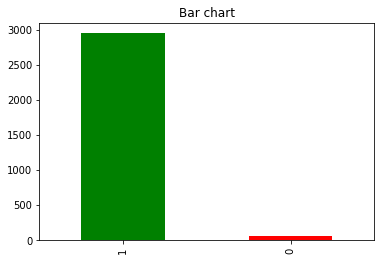

In [58]:
sentimen_data=pd.value_counts(data_label["label"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red"])
plt.title('Bar chart')
plt.show()

Dapat dilihat bahwa isi ulasan produk lebih banyak pada label sentimen 1 atau ulasan dengan rating postitif ini berarti pelanggan yang menggunakan marketplace Tokopedia dan melakukan transaksi pembelian pada produk masker Kesehatan merasa puas bertansaksi di marketplace Tokopedia dan prosuk masker Kesehatan sehingga memberikan feedback atau ulasan komentar lebih banyak yang positif.

In [59]:
from wordcloud import WordCloud

**Ulasan Negatif**

In [60]:
train_s0 = data_label[data_label["label"] == 0]

In [61]:
train_s0["review"] = train_s0["review"].fillna("tidak ada komentar")

<ipython-input-61-9ab4c26af4eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["review"] = train_s0["review"].fillna("tidak ada komentar")


In [62]:
train_s0

,review,label
username,,
n*****1,"pertama kali aku kasih bintang di bwh 4, tpi e...",0
medina_kaulan21,pengiriman cepat sih cuma packingnya pelit bgt...,0
e*****n,Belum dicoba. Nanti aku update kalau barangnya...,0
y*****8,"Astagfirullahaladzim ,\nBener bener Kebangetan...",0
farisfirdaus14,Barang datang dengan baik harga gak tau lah ya...,0
w*****1,"powerbank cm bisa cas 1hp doang, pelayanan pen...",0
ariantisartika190494,"Sesuai pesanan,kualitas belum tau semoga tahan...",0
mumtazdaiman4596,"Packing nya bagus, Body luarnya bagus, lumayan...",0
upgrade_style,"Tampilan oke, tapi kapasitas tidak sesuai yg t...",0


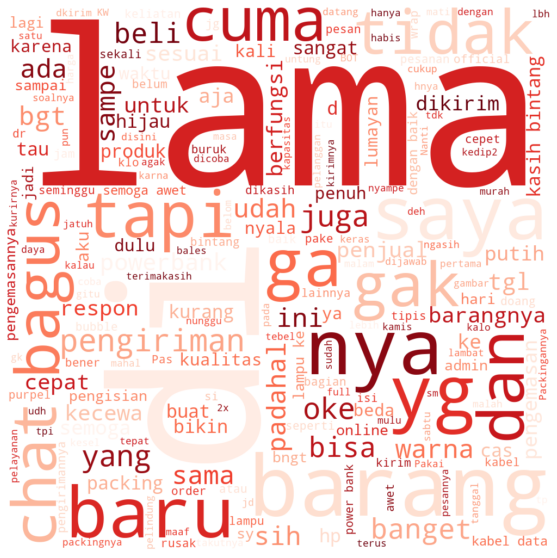

In [63]:
all_text_s0 = ' '.join(word for word in train_s0["review"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Dari visualisasi diatas merupakan wordcloud kata yang paling banyak muncul pada isi ulasan yang memiliki label sentimen negatif. Kata yang paling sering muncul dan mengarah ke ulasan negatif membahas seputar : barang, harga, kirim, kualitas, dan sebagainya. Sehingga dari kata-kata ini bisa menjadi masukan untuk penjual untuk meningkatkan kualitas barang yang paling banyak disebutkan pelanggan dalam hasil Analisa ulasan sentimen yang negatif.

**Ulasan Positif**

In [64]:
train_s1 = data_label[data_label["label"] == 1]

In [65]:
train_s1["review"] = train_s1["review"].fillna("tidak ada komentar")

<ipython-input-65-ef17394a94f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["review"] = train_s1["review"].fillna("tidak ada komentar")


In [66]:
train_s1

,review,label
username,,
salonayu10,Alhamdulillah paketnya sudah sampai dgn aman\n...,1
rubbyaqilla13,"Alhamdulillah, pesanan saya sudah sampai nih k...",1
erikatjhang,"Pengiriman sangat cepat, padahal belinya pas l...",1
nandagiantari2002,"Jika ingin menghubungi layanan PLN 123, kamu d...",1
izkylasoma,alhamdulillah sudah sampai. berfungsi dengan b...,1
...,...,...
hamilham041201,Pengiriman cepat semoga awet,1
riyadarmansyah,"produk oke banget, slim, warna nya hijau mate 👌👌",1
prishelapailo,tidak ada komentar,1


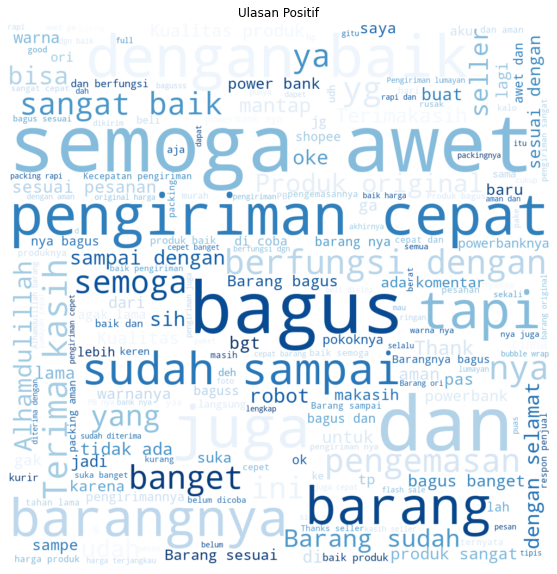

In [67]:
all_text_s1 = ' '.join(word for word in train_s1["review"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

# Menyiapkan Data Train dan Test

In [68]:
data_label['review'] = data_label['review'].fillna("tidak ada komentar")

<ipython-input-68-7afae30ea92b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['review'] = data_label['review'].fillna("tidak ada komentar")


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['review'], data_label['label'], 
                                                    test_size=0.1, stratify=data_label['label'], random_state=30)

# TF-IDF

Pada proses ini kami menggunakan pembobotan TF-IDF(term frequency–inverse document) untuk menghitung manual dengan menggunakan python pembobotan kata dalam dokumen data ulasan.

In [70]:
import numpy as np

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [72]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(2702, 4665)
(301, 4665)


In [73]:
X_train = X_train.toarray()

In [74]:
X_test = X_test.toarray()

# Machine Learning

In [75]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [76]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#deklarasi metode cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
#tuning hyperparameter menggunakan gridsearch

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

#Fitting ke Model
gscv_nb.fit(X_train,y_train)
#mendapatkan hyperparameters terbaik
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 1.0}

In [77]:
nb = GaussianNB(var_smoothing=1.0)

In [78]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=1.0)

In [79]:
y_pred_nb = nb.predict(X_test)

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [81]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred_nb))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred_nb))

--------------------- confusion matrix  ----------------------------
[[  4   2]
 [ 12 283]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

           0       0.25      0.67      0.36         6
           1       0.99      0.96      0.98       295

    accuracy                           0.95       301
   macro avg       0.62      0.81      0.67       301
weighted avg       0.98      0.95      0.96       301

